In [67]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import math
from decimal import *
# create random number generator
rng = np.random.default_rng()

# Numpys Random Package explained

## Introduction

Numpys `random` package is used to create different distributions of numbers. By distribution I mean a group of numbers, which numpy produces `np.array`. These distributions take on different properties depending on what the user is looking for. You can create a distribution with a certain size (the amount of elements in a list), a certain standard deviation (the value of the majority of numbers) and the range (The max and min values of the numbers).

This notebook will explain the different parts of the package and hopefully give the reader an idea of how to use it for their own purposes.

## Simple random data

We'll start with the simple random data section of the package. Within the `random` you can use cerstion functions to create collections of numbers which are ... well simple. There are four in this category.

### `random.integers()`

The `integers` function has 5 parameters (or 'things' that effect the output). The only neccessary one is `low` the rest are optional. What this function does is gives you a random list of integers through a "discrete uniform" distribution. This is a fancy way of saying that the function will try to have (with some slight variance) the same quantity of each number in the list [https://www.youtube.com/watch?v=cyIEhL92wiw&ab_channel=KhanAcademy]. This will make more sense when we actually look at the function.

`low`
`high`
`size`
`dtype`
`endpoint`

Lets first take a look at the `low` parameter. In the documentaion [https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers] it expalians that low can either be an integer or an array-like of ints (basically a list of integers). If we are not using the parameter `high` (see the next parameter), which by default is set to `None`, then `low` determines the highest number in the output array. If `high` is set to a value then `low` is the lowest number in the output array.

It easier to work through the code and see the output:

In [2]:
rng.integers(low=10)

5

I know what you're saying "... great I get a number? What use is that to me?" Well you really can't tell what it's doing until you add the `size` parameter. The `size` parameter is (no points for guessing) the size of the output array or the number of values in the output list.

In [3]:
rng.integers(low=10, size=10)

array([9, 4, 4, 9, 8, 7, 2, 0, 3, 0], dtype=int64)

So as you can see above I now have 10 elements in a numpy array. You'll also notice that not one element is greater then 10, which is what our `low` parameter is set to. If we have no `high` parameter the value given for `low` becomes our high value and the low is automatically 0. But if we set `high` to 8, `low` to 2 and `size` to 10 we should expect to see an output of an array of 10 values no smaller then 2 and no larger then 7 (it's up to but not including `high`).

In [4]:
rng.integers(low=2, high=8, size=10)

array([6, 4, 3, 6, 6, 7, 5, 5, 7, 5], dtype=int64)

Which we do!

If we get a large enough output size you can start to see the uniform distribution talked about above.

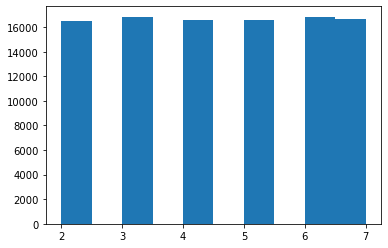

In [5]:
y = rng.integers(low=2, high=8, size=100000)
plt.hist(y)
plt.show()

You can see that they are even across

### `random.random()`

If given no parameters it produces a random float with a possible range of 0 and up to but not including 1.

In [6]:
rng.random()

0.9182651728336466

### `random.choice()`

Lets say you want to simulate a decision. Like rolling a die. If I set `a` to an 7 (it uses up to but not including a and this represents each face on the die) it can simulate a fair roll.

In [7]:
rng.choice(7)

2

### `random.bytes()`

Returns a random number of bytes of length `length`.

In [8]:
rng.bytes(10)

b'+\x08h\xd3\xeb?\xb8\xc3g\x99'

## Permutations

Permutations are ways of how to order your data in an array. NumPy has two in its arsenal. `shuffle` and `permutation`.

We'll start with `shuffle`. Lets say you have an array of numbers but you want them to be in random order then you apply shuffle to it. Lets say we had an array with numbers from one to ten.

In [9]:
rng = np.random.default_rng()
arr = np.arange(10)

to shuffle them we would wrap the array in `shuffle`:

In [10]:
rng.shuffle(arr)

In [11]:
arr = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [12]:
rng.shuffle(arr)
arr

array([[7, 8, 9],
       [1, 2, 3],
       [4, 5, 6]])

### `random.permutation()`

arr = rng.permutation(arr)

In [13]:
array = np.arange(10)
array = rng.permutation(array)

In [14]:
array

array([8, 9, 7, 6, 5, 4, 0, 3, 2, 1])

## Distributions

Certain data sets taken from the real world follow certain rules to a certain extent.

### `random.binomial()`

There are pre-requites that a binomial distribution must have:
1. There are only two potential outcomes per trial.
2. The probability of success (p) is the same across all trials.
3. The number of trials (n) is fixed.
4. Each trial is independent.

Lets take an example [http://www.mathnstuff.com/math/spoken/here/2class/90/binom5.htm]. Lets say we have a class of 14 students and each student has the probability of 0.6 for passing the class. Well there are two possible outcomes: pass or fail. So that's pre-requite number 1 out of the way. The probability of each student passing is the same, the number of students is the same throughout and whether or not a student passes does not rely on the others passing or failing (unless they cheat but we'll assume we've honest students in our school). So we have an example that covers the criteria for a binomial distribution.

"But Seán.." I hear you say "what good is this information if we don't know how to use it?" Great inquisitve question! Lets get stuck in. Here is the formula to calculate all the possible outcomes of a binomial distribution [https://www.youtube.com/watch?v=e04_wUoscBU&ab_channel=zedstatistics]:

$$ P(X = x) = \binom{n}{x}p^{x}(1-p)^{n-x} $$

This can be read as: The probability that x amount of trails are successful

$$ P(X = x) $$

is equal to the the number of ways you can have x number of successes out of n trials

$$ = \binom{n}{x} $$

Note (we will need this for our calculation below): 

$$ \binom{n}{x} = \frac{n!}{(n-x)!x!} $$

multiplied by the probability of success (p) to the power of the number of successes (x)

$$ p^{x} $$

muliplies by the probability of failure (1-p) to the power of the number of failures (n-x)

$$ (1-p)^{n-x} $$

So in our example above the number of "trials" (n) are the tests our students take so 14 (because there are 14 students). The probability of success (p) for each student is given as 0.6. Lastly we need to choose our x, the number of successful trials we want the probability of we'll see how what it is for the case if half our students pass so x is 7. We can now use the formula to find the probability:

In [15]:
x = 7
n = 14
p = 0.6
# combination
com = math.factorial(n)/(math.factorial(n-x)*math.factorial(x))

P = com*(p**x)*((1-p)**(n-x))

In [16]:
P

0.15740769927168002

This is the probability of number of trial successes but what we are looking for is a distribution. This distribution shows the probability for each possible outcome (i.e. from the probability of one successful trial to them all being successful). By turning our code above into a loop we can output this full distribution.

In [17]:
def binomialProbabilities(n, p):
    probDistribution = []
    for x in range(0, n+1):
        com = math.factorial(n)/(math.factorial(n-x)*math.factorial(x))
        P = com*(p**x)*((1-p)**(n-x))
        probDistribution.append(P)
        
    return probDistribution

In [18]:
binomialProbabilities(14, 0.6)

[2.684354560000002e-06,
 5.637144576000004e-05,
 0.0005496215961600003,
 0.0032977295769600016,
 0.013603134504960007,
 0.040809403514880015,
 0.09182115790848003,
 0.15740769927168002,
 0.20659760529408,
 0.20659760529408,
 0.15494820397055997,
 0.08451720216575999,
 0.03169395081215999,
 0.007313988648959996,
 0.0007836416409599996]

The parameters of numpys `binomial()` function are the number of experiments `size`, the numbers of trials `n` in each experiment and the probability of success `p`. What the function does is uses the above probability formula to produce numbers that match the probability distribution. So lets say you ran the `binomial` function with the `n` and `p` above 100,000 times. This will produce an array with simulated data of the number of successful trials for each of the 100,000 experiments.

In theory if we were to view the distribution of our experiments and the distribution of the probability they should look similar.

In [19]:
number_of_successes = rng.binomial(14, 0.6, 100000)

<function matplotlib.pyplot.show(*args, **kw)>

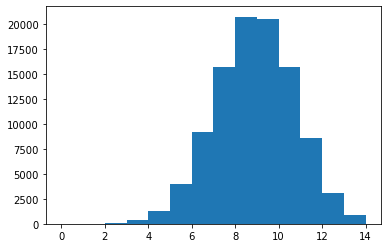

In [20]:
plt.hist(number_of_successes, 14)
plt.show

In [21]:
probabilities = binomialProbabilities(14, 0.6)

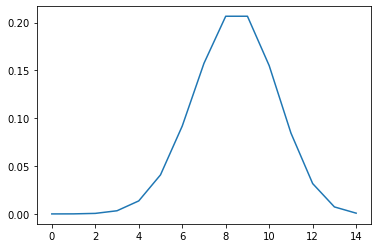

In [22]:
plt.plot(np.arange(15) ,probabilities)

And what do you know! It does.

### `random.poisson()`

The poisson distribution is discrete which means it can only contain a discrete set of values. The distribution describes the number of events occurring in a fixed time interval or region of opportunity. For example how many customers a shop gets every hour. In this example there is a fixed time interval of an hour and this distribution might discribe the number of events in that hour.[https://www.youtube.com/watch?v=cPOChr_kuQs&ab_channel=zedstatistics]

This distribution requires only one parameter, $ \lambda $ (the poisson distribution), which is the expected number of events per time interval. This can also be looked as the mean number of events per time interval. It is also bounded by zero and infinety, [0, $ \infty $),

Assumptions:
1. The rate at which events occur is constant (i.e. that in a given time interval the probability of an event happening should be the exact same as every other time interval of that size).
2. The occurrence of one event does not affect the occurrence of a subsequent event (i.e. events are independent).

The probability mass function is the formula used to determine the probability that a certain number of events ($ x $) will happen in a time interval with the poisson distribution ($ \lambda $). It is give as:

$$ P(X=x) = \frac{e^{-\lambda} \lambda^x}{x!} $$

So given our shop example if we wanted to find the probability of a shop getting 5 customers when the shop gets an average of 3 customers per hour (our time interval for this example). Then the Probability can be worked out by plugging in our values:

$$ P(X=5) = \frac{e^{-3} 3^5}{5!} $$

Which can worked out as:

$$ P(X=x) = 0.101 $$

We can also work it out with Python.

In [23]:
lam = 3
x = 5

poissonP = (math.exp(-lam)*(lam**x))/(math.factorial(x))
poissonP

0.10081881344492448

Like above we are looking for a distribution. By looping over the equation above we can find the probability for each possible outcome

In [24]:
probDistribution = np.array([])
np.append(probDistribution, np.float(3.567))
probDistribution

array([], dtype=float64)

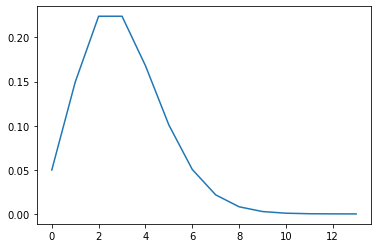

In [95]:
def poissonProbability(lam):
    probDistribution = []
    poissonP = 0
    for x in range(14):
        poissonP = math.exp(-lam)*(lam**x)/math.factorial(x)
        probDistribution.append(poissonP)
        
    return probDistribution


plt.plot(poissonProbability(3))

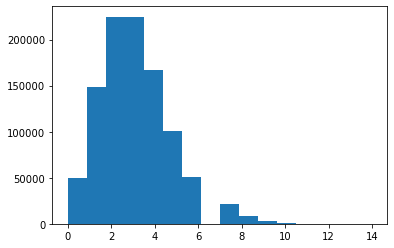

In [28]:
y = rng.poisson(3,1000000)
plt.hist(y,16)
plt.show()

We can see from the first graph that the probability of getting 3 customers per hour is above a probability of 0.20 and that to either side of that it becomes less and less likely to get the number of customers per hour. The second graph shows the same thing only with actual events. We can see that there are over 200,000 times when 3 customers entered our store.

### `random.exponential()`

A distribution must have a few requirements to be considered a exponential distribution.

The first being that an exponential distribution is actually the time between events in a Poisson process (i.e. the "inverse" of Poisson, check the previous distribution). 

For example:

| Poisson | Exponential |
|:-:|:-:|
| number of cars passing a tollgate in one hour | Number of hours between arrivals |
|   cars per hour | hours per car |
|   number of customers arriving at a store in a minute | number of minutes between customers arriving |
|   customers per minute | minutes per customers |
| **Events per single unit of time** | **Time per single event (time between events)**|

An exponential distribution must have events that occur at a constant rate and these events must be independent of each other. Meaning that a car passing through a tollgate has no bearing on the time of the next car passing or the number of cars passing in an hour. When it meets these two criteria the exponential distribution can be characterized as memoryless



I'm going to use the shop example from the poisson distribution explaination above. Above we said that our shop had an average of 3 customers per hour, or that our poisson distribution ($ \lambda $) was 3. The distribution for a poisson distribution is classes as "discrete" meaning we can't have 2.5 customers we can either 2 or 3. In an exponential distributon it represents hours until next arrival. This will be represented with a continous curve (because we can have half an hour) which we call a probability density function. The mean for the poisson distribution is $ \lambda $ and no surprise that mean for the exponential distributon is the inverse of this or $ \frac{1}{\lambda} $ otherwise know as $ \mu $[
[https://www.youtube.com/watch?v=2kg1O0j1J9c&ab_channel=zedstatistics]].

So the mean for an exponential distributon is:

$$ \mu = \frac{1}{\lambda} $$

So in our example we see (on average) 3 customers per hour but we could also say that we see 1 customer every 20 minutes (or $ \frac{1}{3} $ of an hour). For our example we're going to convert to minutes so our mu is 20 minutes ($ \mu = 20 $).

So how do we get the probability that a customer will arrive in the next 10 minutes lets say. Well we can get it by the following formula:

$$ P(X < x) = 1 - e^{\frac{-x}{\mu}} $$

Filling in what we know ( $ \mu = 20 $ and $ x = 10 $) we get:

$$ P(X < 10) = 1 - e^{\frac{-10}{20}} $$

Which means our probability of a customer coming in the next 10 minutes is 0.39346934.

$$ P(X < 10) = 0.39346934 $$

Getting a range and graphing can see the likelihood of someone arriving after a given length of time:

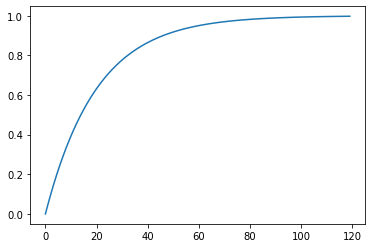

In [33]:
mu = 20
likelihood = []
for x in range(120):
    L = 1 - math.exp(-x/mu)
    likelihood.append(L)
    
plt.plot(likelihood)

The above graph represents the likelihood of a customer entering the shop in a certain time interval. Or the probabilty that someone will walk in in the next x amount of minutes. You'll notice that the longer we wait the more likely it is that someone will arrive. The x-axis is in minutes and we can see that after 60 minutes it becomes rapidly more likely that a customer will enter.

Its probability density function is given with the equation [https://en.wikipedia.org/wiki/Exponential_distribution]:

$$ P(X < x) = \frac{1}{\mu} e^{\frac{-x}{\mu}} $$

This will show the probability of the next arrival will be in x minutes. We can represent this with Python.

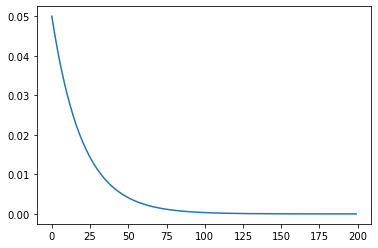

In [105]:
def exponentialProbability(mu):
    probDistribution = []
    for x in range(200):
        exponentialP = (1/mu)*math.exp(-x/mu)
        probDistribution.append(exponentialP)

    return probDistribution

plt.plot(exponentialProbability(20))

Above you can see that the probability of a time lets say $ x = 25 $ or 25 minutes. We can infer that the probability of someone arriving in the next 25 minutes is just above 0.01.

Similarly if we use the `exponential()` function to create a sample size of 50,000 (`size`) where our $ \mu $ is 20 (`scale` when using the function) we can see a similar shape as above [https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html#numpy.random.Generator.exponential]. Showing that there are over 30,000 times a person arrived in about 20 minutes and it continuly gets less the longer the time `x`.

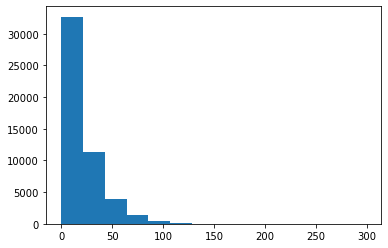

In [106]:
plt.hist(rng.exponential(scale = 20, size = 50000), 14)
plt.show()

### `random.normal()`

The probability distribution function:

$$ P(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

[https://www.youtube.com/watch?v=RKdB1d5-OE0&list=PLTNMv857s9WVzutwxaMb0YZKW7hoveGLS&index=6&ab_channel=zedstatistics]



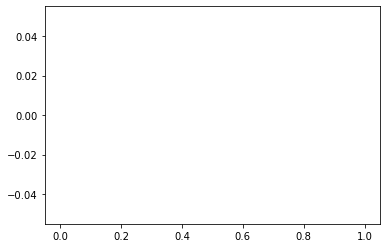

In [129]:
mu = 14.5 # MOST LIKELY 
std = 0.5 # 


arr = []
for x in range(12, ):
    P = (1/(math.sqrt(2*math.pi*(std**2))))*math.exp((1*(x-mu)**2)/(2*(std**2)))
    print(P)
    arr.append(P)
    
plt.hist(arr)
plt.show()

if enough time

### `random.chisquare()`

[https://www.youtube.com/watch?v=80ffqpZdKiA&list=PLTNMv857s9WVzutwxaMb0YZKW7hoveGLS&index=8&ab_channel=zedstatistics]

if not

### `random.uniform()`